In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
rssi = pd.read_csv("RSSI_Performance_Testing.csv")
rssi.drop(columns = ["RSSI Desired"], inplace = True)
rssi

,RSSI Actual,Downstream Bandwidth,Downstream Jitter,Downstream Packet Loss,Upstream Bandwidth,Upstream Jitter,Upstream Packet Loss
0,-53,19.8,4.594,28%,13.60,2.778,0.05%
1,-60,19.8,8.270,29%,10.30,4.597,0.22%
2,-65,19.8,8.200,37%,11.40,6.459,0.40%
3,-70,19.8,8.257,26%,10.40,4.446,0.38%
4,-73,19.8,15.972,30%,8.87,5.411,0.67%


In [57]:
rssi['Downstream Packet Loss'] = rssi['Downstream Packet Loss'].str.rstrip('%').astype('float') / 100.0
rssi['Upstream Packet Loss'] = rssi['Upstream Packet Loss'].str.rstrip('%').astype('float') / 100.0

<AxesSubplot:>

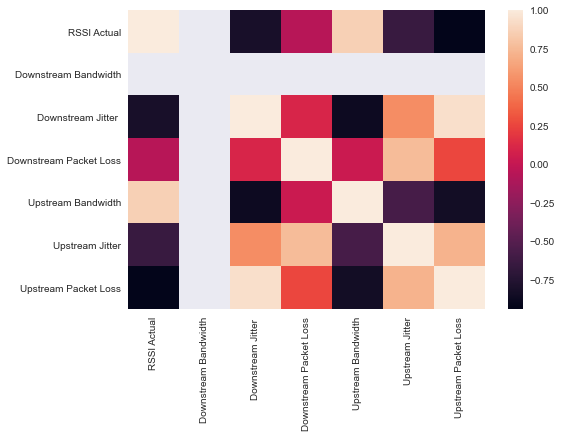

In [58]:
import seaborn as sns
corr = rssi.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [59]:
rssi.columns

Index(['RSSI Actual', 'Downstream Bandwidth', 'Downstream Jitter ',
       'Downstream Packet Loss', 'Upstream Bandwidth', 'Upstream Jitter',
       'Upstream Packet Loss'],
      dtype='object')

Text(0, 0.5, 'RSSI Value')

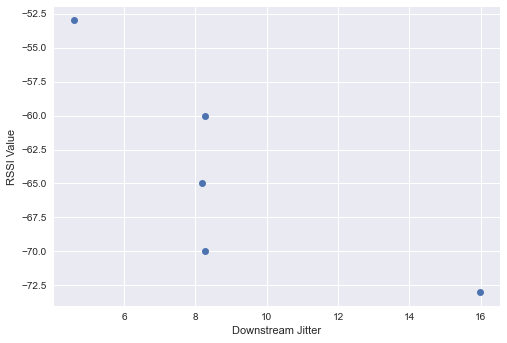

In [60]:
plt.style.use("seaborn")
plt.plot(rssi["Downstream Jitter "], rssi["RSSI Actual"], 'o')
plt.xlabel("Downstream Jitter")
plt.ylabel("RSSI Value")

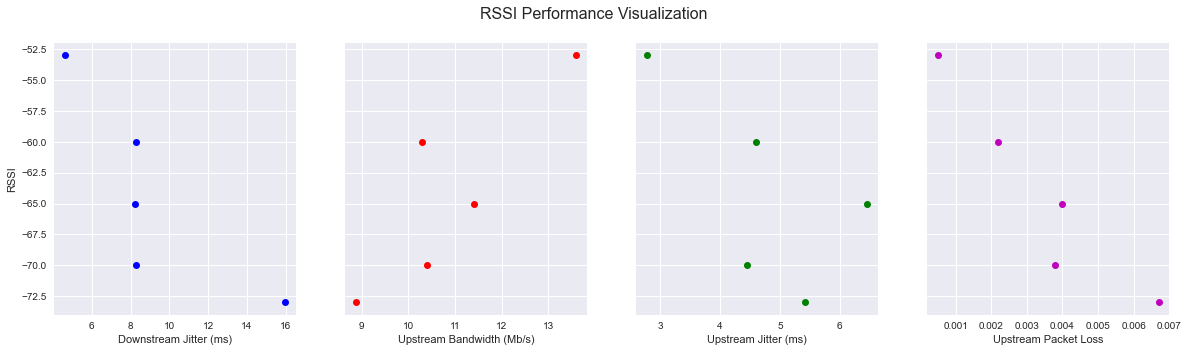

In [73]:
fig, axs = plt.subplots(1, 4, figsize = (20, 5))
fig.suptitle('RSSI Performance Visualization', fontsize=16)

axs[0].plot(rssi["Downstream Jitter "], rssi["RSSI Actual"], 'bo')
axs[0].set_ylabel("RSSI")
axs[0].set_xlabel("Downstream Jitter (ms)")

axs[1].plot(rssi["Upstream Bandwidth"], rssi["RSSI Actual"], 'ro')
axs[1].set_xlabel("Upstream Bandwidth (Mb/s)")

axs[2].plot(rssi["Upstream Jitter"], rssi["RSSI Actual"], 'go')
axs[2].set_xlabel("Upstream Jitter (ms)")


axs[3].plot(rssi["Upstream Packet Loss"], rssi["RSSI Actual"], 'mo')
axs[3].set_xlabel("Upstream Packet Loss")

for ax in axs.flat:
    ax.label_outer()